## Notebook for 3 Classes

In [84]:
import os
from PIL import Image

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.io import decode_jpeg
from tensorflow.keras import Sequential, regularizers
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, LayerNormalization, \
                                    BatchNormalization, Activation, MaxPool2D, AveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator, NumpyArrayIterator

In [2]:
parent_dir =  os.path.dirname(os.getcwd())

In [3]:
parent_dir

'C:\\Users\\Kevin\\Documents\\Flatiron\\Phase4_Project'

In [4]:
train_path = os.path.join(parent_dir, 'Data\\train_3')
test_path = os.path.join(parent_dir, 'Data\\test_3')

In [5]:
bacterial_filenames = os.listdir(os.path.join(train_path, 'bacterial'))
viral_filenames = os.listdir(os.path.join(train_path, 'viral'))
normal_filenames = os.listdir(os.path.join(train_path, 'normal'))

## Examples of Bacterial Pneumonia

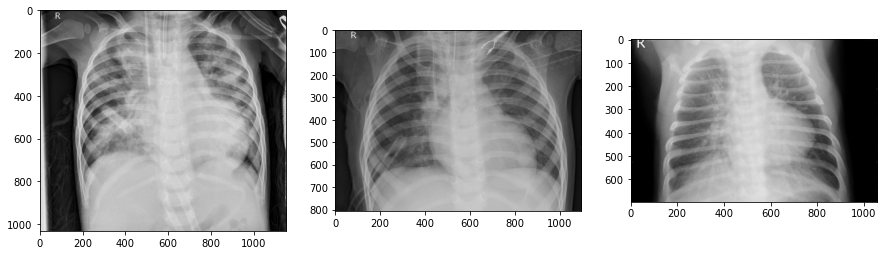

In [7]:
plt.figure(figsize=(15,15))
for i in range(3):
    filename = bacterial_filenames[i]
    img_addr = train_path + '\\bacterial\\' + filename
    img = Image.open(img_addr)
    ax = plt.subplot(1,3,i+1)
    plt.imshow(img, cmap='gray')

## Examples of Viral Pneumonia

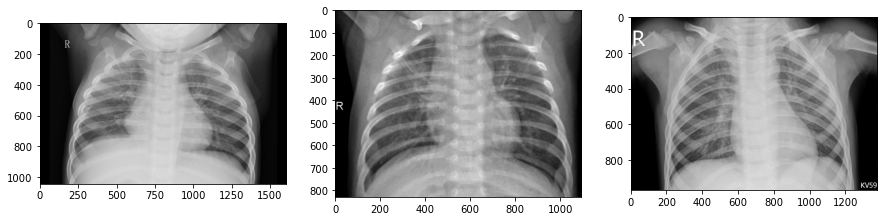

In [8]:
plt.figure(figsize=(15,15))
for i in range(3):
    filename = viral_filenames[i]
    img_addr = train_path + '\\viral\\' + filename
    img = Image.open(img_addr)
    ax = plt.subplot(1,3,i+1)
    plt.imshow(img, cmap='gray')

## Examples of Healthy Lungs

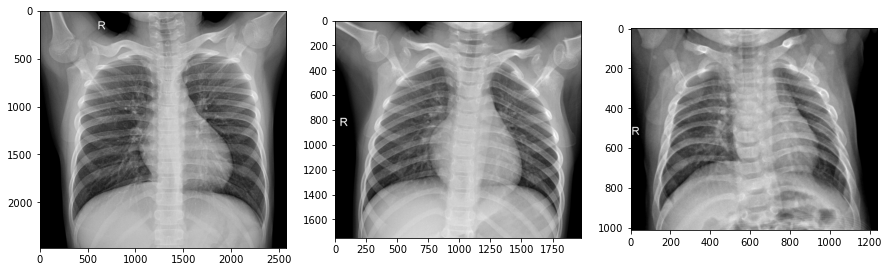

In [9]:
plt.figure(figsize=(15,15))
for i in range(3):
    filename = normal_filenames[i]
    img_addr = train_path + '\\normal\\' + filename
    img = Image.open(img_addr)
    ax = plt.subplot(1,3,i+1)
    plt.imshow(img, cmap='gray')

## Model 1

In [32]:
img_size = (128, 128)
batch_size = 32
brightness = [0.8, 1.2]
vsplit = 0.2
rrange = 10
seed = 2023

train_datagen = ImageDataGenerator(validation_split=vsplit, rotation_range=rrange, fill_mode='nearest',
                                   brightness_range=brightness)

print('----')
train_generator = train_datagen.flow_from_directory(train_path, target_size=img_size, batch_size=batch_size,
                                                    class_mode='categorical', color_mode='grayscale', subset='training',
                                                    shuffle=True, seed=seed)
print('----')
val_generator = train_datagen.flow_from_directory(train_path, target_size=img_size, batch_size=batch_size,
                                                    class_mode='categorical', color_mode='grayscale', subset='validation',
                                                    shuffle=True, seed=seed)

print('----')
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(test_path, target_size=img_size, batch_size=batch_size,
                                                  class_mode='categorical', color_mode='grayscale')

----
Found 4187 images belonging to 3 classes.
----
Found 1045 images belonging to 3 classes.
----
Found 624 images belonging to 3 classes.


### Examples of Augmented Images, Labelled by Class

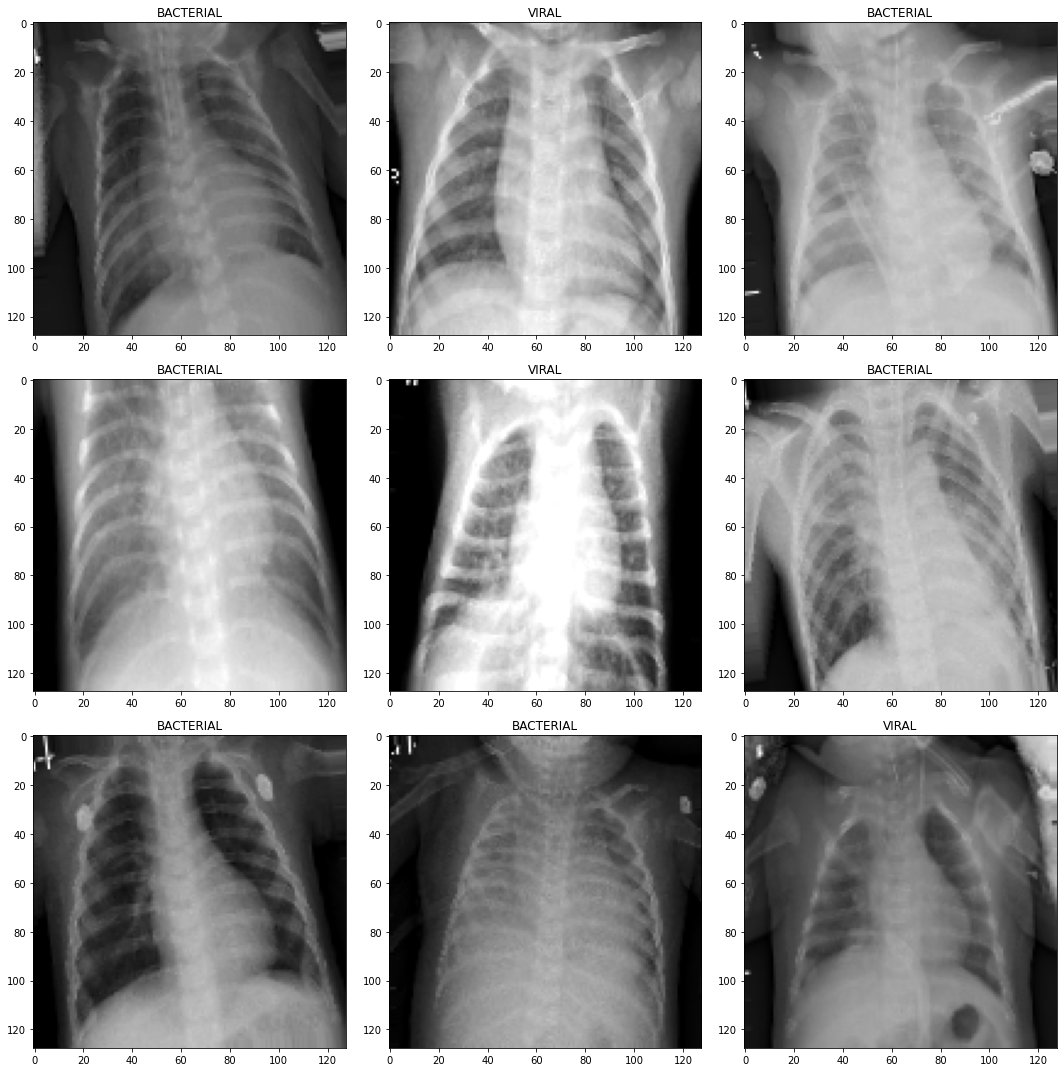

In [34]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
classes = ['BACTERIAL', 'NORMAL', 'VIRAL']
for i, ax in enumerate(axes.flat):
    img, label = train_generator.next()
    for i, j in enumerate(label[0]):
        if j == 1:
            label = classes[i]
    ax.imshow(img[0], cmap='gray')
    ax.set(title=f"{label}")
plt.tight_layout()
plt.show()

In [35]:
model = Sequential(name='Model1')

In [36]:
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(128,128,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [37]:
model.summary()

Model: "Model1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 126, 126, 128)     1280      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 63, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 61, 61, 128)       147584    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 64)        73792     
_________________________________________________________________
flatten_2 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                32113

In [38]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['Recall', 'Precision', 'accuracy'])
model.fit(train_generator, epochs=20, workers=10, validation_data=val_generator, validation_steps=100//batch_size)

Epoch 1/20
131/131 [==============================] - 78s 598ms/step - loss: 4.6005 - recall: 0.1729 - precision: 0.5262 - accuracy: 0.5422 - val_loss: 0.9688 - val_recall: 0.0521 - val_precision: 0.5000 - val_accuracy: 0.6979
Epoch 2/20
131/131 [==============================] - 77s 585ms/step - loss: 0.9383 - recall: 0.3052 - precision: 0.6751 - accuracy: 0.6047 - val_loss: 0.8404 - val_recall: 0.5312 - val_precision: 0.6800 - val_accuracy: 0.6250
Epoch 3/20
131/131 [==============================] - 77s 587ms/step - loss: 0.9530 - recall: 0.5013 - precision: 0.6751 - accuracy: 0.6164 - val_loss: 0.9719 - val_recall: 0.4375 - val_precision: 0.5915 - val_accuracy: 0.5312
Epoch 4/20
131/131 [==============================] - 78s 592ms/step - loss: 0.8611 - recall: 0.5121 - precision: 0.6912 - accuracy: 0.6200 - val_loss: 0.7770 - val_recall: 0.5417 - val_precision: 0.6933 - val_accuracy: 0.6562
Epoch 5/20
131/131 [==============================] - 77s 586ms/step - loss: 0.8656 - recall

In [39]:
model.evaluate(test_generator)

20/20 [==============================] - 7s 353ms/step - loss: 1.3293 - recall: 0.7035 - precision: 0.7280 - accuracy: 0.7131


[1.329296350479126, 0.7035256624221802, 0.7280265092849731, 0.7131410241127014]

## Model 2 -- Using Residual Connections

In [89]:
img_size = (128, 128)
batch_size = 32
brightness = [0.8, 1.2]
vsplit = 0.2
rrange = 10
seed = 2023

train_datagen = ImageDataGenerator(validation_split=vsplit, rotation_range=rrange, fill_mode='nearest',
                                   brightness_range=brightness)

print('----')
train_generator = train_datagen.flow_from_directory(train_path, target_size=img_size, batch_size=batch_size,
                                                    class_mode='categorical', color_mode='grayscale', subset='training',
                                                    shuffle=True, seed=seed)
print('----')
val_generator = train_datagen.flow_from_directory(train_path, target_size=img_size, batch_size=batch_size,
                                                    class_mode='categorical', color_mode='grayscale', subset='validation',
                                                    shuffle=True, seed=seed)

print('----')
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(test_path, target_size=img_size, batch_size=batch_size,
                                                  class_mode='categorical', color_mode='grayscale')

----
Found 4187 images belonging to 3 classes.
----
Found 1045 images belonging to 3 classes.
----
Found 624 images belonging to 3 classes.


In [85]:
def identity_block(x, filter):
    # copy tensor to variable called x_skip
    x_skip = x
    # Layer 1
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Layer 2
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Add Residue
    x = tf.keras.layers.Add()([x, x_skip])     
    x = tf.keras.layers.Activation('relu')(x)
    return x

In [86]:
def convolutional_block(x, filter):
    # copy tensor to variable called x_skip
    x_skip = x
    # Layer 1
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same', strides = (2,2))(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Layer 2
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Processing Residue with conv(1,1)
    x_skip = tf.keras.layers.Conv2D(filter, (1,1), strides = (2,2))(x_skip)
    # Add Residue
    x = tf.keras.layers.Add()([x, x_skip])     
    x = tf.keras.layers.Activation('relu')(x)
    return x

In [87]:
def ResNet34(shape = (128, 128, 1), classes = 3):
    # Step 1 (Setup Input Layer)
    x_input = tf.keras.layers.Input(shape)
    # Step 2 (Initial Conv layer along with maxPool)
    x = Conv2D(128, kernel_size=(3,3), strides=2, padding='same')(x_input)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPool2D(pool_size=(2,2), strides=2, padding='same')(x)
    # Define size of sub-blocks and initial filter size
    block_layers = [3, 4, 6, 3]
    filter_size = 128
    # Step 3 Add the Resnet Blocks
    for i in range(4):
        if i == 0:
            # For sub-block 1 Residual/Convolutional block not needed
            for j in range(block_layers[i]):
                x = identity_block(x, filter_size)
        else:
            # One Residual/Convolutional Block followed by Identity blocks
            # The filter size will go on increasing by a factor of 2
            filter_size = filter_size*2
            x = convolutional_block(x, filter_size)
            for j in range(block_layers[i] - 1):
                x = identity_block(x, filter_size)
    # Step 4 End Dense Network
    x = AveragePooling2D((2,2), padding = 'same')(x)
    x = Flatten()(x)
    x = Dense(512, activation = 'relu')(x)
    x = Dense(classes, activation = 'softmax')(x)
    model = Model(inputs = x_input, outputs = x, name = "ResNet34")
    return model

In [ ]:
def ResModel(shape, classes):
    # Define Input Layer
    x_input = Input(shape)
    # Intial Convolutional Layer and Max Pool
    x = Conv2D(128, kernel_size=(3,3), strides=2)(x_inBatchNormalization= BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPool2D(pool_size=(2,2), strides=2)(x)

In [88]:
model3 = ResNet34()

In [91]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['Recall', 'Precision', 'accuracy'])
model3.fit(train_generator, epochs=20, workers=10, validation_data=val_generator, validation_steps=100//batch_size)

Epoch 1/20
131/131 [==============================] - 663s 5s/step - loss: 1.8473 - recall: 0.3685 - precision: 0.5664 - accuracy: 0.5185 - val_loss: 777.7073 - val_recall: 0.5312 - val_precision: 0.5368 - val_accuracy: 0.5312
Epoch 2/20
131/131 [==============================] - 652s 5s/step - loss: 0.7351 - recall: 0.6389 - precision: 0.7095 - accuracy: 0.6778 - val_loss: 0.8895 - val_recall: 0.6146 - val_precision: 0.7108 - val_accuracy: 0.6458
Epoch 3/20
131/131 [==============================] - 636s 5s/step - loss: 0.5982 - recall: 0.7218 - precision: 0.7660 - accuracy: 0.7471 - val_loss: 0.9388 - val_recall: 0.6354 - val_precision: 0.7262 - val_accuracy: 0.7083
Epoch 4/20
131/131 [==============================] - 644s 5s/step - loss: 0.5781 - recall: 0.7251 - precision: 0.7665 - accuracy: 0.7483 - val_loss: 0.7382 - val_recall: 0.6667 - val_precision: 0.6882 - val_accuracy: 0.6771
Epoch 5/20
131/131 [==============================] - 635s 5s/step - loss: 0.5358 - recall: 0.7416

In [92]:
model3.evaluate(test_generator)

20/20 [==============================] - 13s 640ms/step - loss: 0.5670 - recall: 0.7115 - precision: 0.8132 - accuracy: 0.7596


[0.5669689178466797,
 0.7115384340286255,
 0.8131868243217468,
 0.7596153616905212]

In [130]:
model2 = Sequential(name='Model2')

model2.add(Conv2D(256, kernel_size=(3,3), activation='relu', input_shape=(256,256,1)))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(64, (3,3), activation='relu'))
model2.add(Flatten())

model2.add(LayerNormalization())
model2.add(Dropout(0.2))

model2.add(Dense(64, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [131]:
model2.summary()

Model: "Model2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_94 (Conv2D)           (None, 254, 254, 128)     1280      
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 127, 127, 128)     0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 125, 125, 128)     147584    
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 62, 62, 128)       0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 60, 60, 128)       147584    
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 28, 28, 64)        73792

In [ ]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall', 'Precision', 'accuracy'])
model2.fit(train_generator, epochs=20, workers=10, validation_data=val_generator, validation_steps=100//batch_size)

Epoch 1/20
66/66 [==============================] - 326s 5s/step - loss: 2.3706 - recall: 0.8458 - precision: 0.8348 - accuracy: 0.7614 - val_loss: 0.1383 - val_recall: 1.0000 - val_precision: 0.9038 - val_accuracy: 0.9219
Epoch 2/20
66/66 [==============================] - 327s 5s/step - loss: 0.3940 - recall: 0.9211 - precision: 0.8919 - accuracy: 0.8586 - val_loss: 0.2300 - val_recall: 1.0000 - val_precision: 0.9245 - val_accuracy: 0.9375
Epoch 3/20
66/66 [==============================] - 335s 5s/step - loss: 0.2521 - recall: 0.9372 - precision: 0.9306 - accuracy: 0.9016 - val_loss: 0.1797 - val_recall: 0.9302 - val_precision: 1.0000 - val_accuracy: 0.9531
Epoch 4/20
66/66 [==============================] - 331s 5s/step - loss: 0.2567 - recall: 0.9398 - precision: 0.9299 - accuracy: 0.9028 - val_loss: 0.0783 - val_recall: 0.9796 - val_precision: 0.9600 - val_accuracy: 0.9531
Epoch 5/20
66/66 [==============================] - 325s 5s/step - loss: 0.5557 - recall: 0.9240 - precision

In [ ]:
input = Input(shape=(input_shape[0], input_shape[1], input_shape[2]))

'''block_1'''
b1_cnv2d_1 = Conv2D(filters=16, kernel_size=(3, 3), strides=(2, 2), padding='same',
                 use_bias=False, name='b1_cnv2d_1', kernel_initializer='normal')(input)
b1_relu_1 = ReLU(name='b1_relu_1')(b1_cnv2d_1)
b1_bn_1 = BatchNormalization(epsilon=1e-3, momentum=0.999, name='b1_bn_1')(b1_relu_1)  # size: 14*14

b1_cnv2d_2 = Conv2D(filters=32, kernel_size=(1, 1), strides=(2, 2), padding='same',
                    use_bias=False, name='b1_cnv2d_2', kernel_initializer='normal')(b1_bn_1)
b1_relu_2 = ReLU(name='b1_relu_2')(b1_cnv2d_2)
b1_out = BatchNormalization(epsilon=1e-3, momentum=0.999, name='b1_out')(b1_relu_2)  # size: 14*14

'''block 2'''
b2_cnv2d_1 = Conv2D(filters=32, kernel_size=(1, 1), strides=(1, 1), padding='same',
                    use_bias=False, name='b2_cnv2d_1', kernel_initializer='normal')(b1_out)
b2_relu_1 = ReLU(name='b2_relu_1')(b2_cnv2d_1)
b2_bn_1 = BatchNormalization(epsilon=1e-3, momentum=0.999, name='b2_bn_1')(b2_relu_1)  # size: 14*14

b2_add = add([b1_out, b2_bn_1])  #

b2_cnv2d_2 = Conv2D(filters=64, kernel_size=(3, 3), strides=(2, 2), padding='same',
                    use_bias=False, name='b2_cnv2d_2', kernel_initializer='normal')(b2_add)
b2_relu_2 = ReLU(name='b2_relu_2')(b2_cnv2d_2)
b2_out = BatchNormalization(epsilon=1e-3, momentum=0.999, name='b2_bn_2')(b2_relu_2)  # size: 7*7

'''block 3'''
b3_cnv2d_1 = Conv2D(filters=64, kernel_size=(1, 1), strides=(1, 1), padding='same',
                    use_bias=False, name='b3_cnv2d_1', kernel_initializer='normal')(b2_out)
b3_relu_1 = ReLU(name='b3_relu_1')(b3_cnv2d_1)
b3_bn_1 = BatchNormalization(epsilon=1e-3, momentum=0.999, name='b3_bn_1')(b3_relu_1)  # size: 7*7

b3_add = add([b2_out, b3_bn_1])  #

b3_cnv2d_2 = Conv2D(filters=128, kernel_size=(3, 3), strides=(2, 2), padding='same',
                    use_bias=False, name='b3_cnv2d_2', kernel_initializer='normal')(b3_add)
b3_relu_2 = ReLU(name='b3_relu_2')(b3_cnv2d_2)
b3_out = BatchNormalization(epsilon=1e-3, momentum=0.999, name='b3_out')(b3_relu_2)  # size: 3*3

'''block 4'''
b4_avg_p = GlobalAveragePooling2D()(b3_out)
output = Dense(output_shape, name='model_output', activation='softmax',
               kernel_initializer='he_uniform')(b4_avg_p)

model = Model(input, output)

model_json = model.to_json()

with open("sample_res_net_v0.json", "w") as json_file:
    json_file.write(model_json)
model.summary()
return model